In [1]:

import yfinance as yf
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
from math import floor




In [2]:
nasdaq_data = yf.download(tickers = "^IXIC",start="2010-01-01",
                     end="2023-05-05")
print(nasdaq_data)



[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2010-01-04   2294.409912   2311.149902   2294.409912   2308.419922   
2010-01-05   2307.270020   2313.729980   2295.620117   2308.709961   
2010-01-06   2307.709961   2314.070068   2295.679932   2301.090088   
2010-01-07   2298.090088   2301.300049   2285.219971   2300.050049   
2010-01-08   2292.239990   2317.600098   2290.610107   2317.169922   
...                  ...           ...           ...           ...   
2023-04-28  12117.540039  12227.719727  12082.570312  12226.580078   
2023-05-01  12210.049805  12261.320312  12181.080078  12212.599609   
2023-05-02  12198.019531  12206.580078  12015.230469  12080.509766   
2023-05-03  12097.040039  12212.549805  12022.459961  12025.330078   
2023-05-04  11997.339844  12033.150391  11925.370117  11966.400391   

               Adj C

In [3]:
nse_data=yf.download(tickers = "^NSEI",start="2010-01-01",
                     end="2023-05-05")
print(nse_data)


[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2010-01-04   5200.899902   5238.450195   5167.100098   5232.200195   
2010-01-05   5277.149902   5288.350098   5242.399902   5277.899902   
2010-01-06   5278.149902   5310.850098   5260.049805   5281.799805   
2010-01-07   5281.799805   5302.549805   5244.750000   5263.100098   
2010-01-08   5264.250000   5276.750000   5234.700195   5244.750000   
...                  ...           ...           ...           ...   
2023-04-27  17813.099609  17931.599609  17797.900391  17915.050781   
2023-04-28  17950.400391  18089.150391  17885.300781  18065.000000   
2023-05-02  18124.800781  18180.250000  18101.750000  18147.650391   
2023-05-03  18113.800781  18116.349609  18042.400391  18089.849609   
2023-05-04  18081.000000  18267.449219  18066.699219  18255.800781   

               Adj C

In [4]:
nasdaq_close=nasdaq_data['Close']
nse_close=nse_data['Close']

correlation_coefficient=nasdaq_close.corr(nse_close)
correlation_coefficient

0.9512250663071247

since correlation value is close to one which indicates a strong positive correlation, meaning the indices tend to move in the same direction

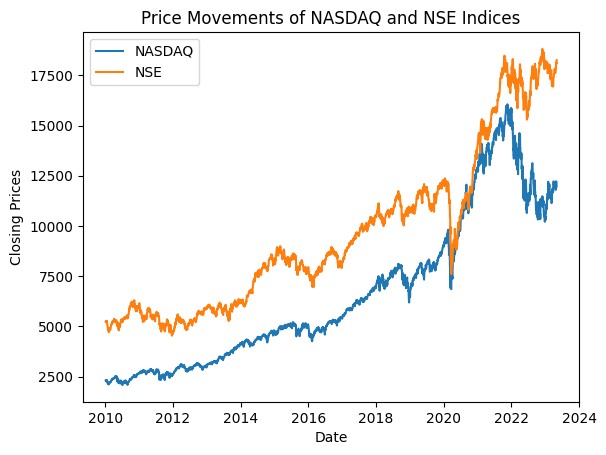

In [5]:
plt.plot(nasdaq_close, label='NASDAQ')
plt.plot(nse_close,label='NSE')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Price Movements of NASDAQ and NSE Indices')
plt.legend()



clearly, from the plots in the graph 'NSE' leads 'NASDAQ' in maximum time interval.
So,we will use the leading index (NSE) for parameter optimization

In [6]:


def get_kc(high, low, close, kc_lookback, multiplier,atr_lookback):
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis=1, join='inner').max(axis=1)
    atr = tr.ewm(alpha=1/atr_lookback).mean()

    kc_middle = close.ewm(kc_lookback).mean()
    kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
    kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr

    return kc_middle, kc_upper, kc_lower

nasdaq_data['kc_middle'], nasdaq_data['kc_upper'], nasdaq_data['kc_lower'] = get_kc(nasdaq_data['High'], nasdaq_data['Low'], nasdaq_data['Close'], 20, 2,10)
print(nasdaq_data.tail())



                    Open          High           Low         Close  \
Date                                                                 
2023-04-28  12117.540039  12227.719727  12082.570312  12226.580078   
2023-05-01  12210.049805  12261.320312  12181.080078  12212.599609   
2023-05-02  12198.019531  12206.580078  12015.230469  12080.509766   
2023-05-03  12097.040039  12212.549805  12022.459961  12025.330078   
2023-05-04  11997.339844  12033.150391  11925.370117  11966.400391   

               Adj Close      Volume     kc_middle      kc_upper      kc_lower  
Date                                                                            
2023-04-28  12226.580078  5331380000  11890.400476  12247.518795  11533.282157  
2023-05-01  12212.599609  5168430000  11905.743292  12243.197826  11568.288758  
2023-05-02  12080.509766  5501410000  11914.065505  12257.248414  11570.882596  
2023-05-03  12025.330078  5782160000  11919.363818  12266.246404  11572.481231  
2023-05-04  11966.40039

In [7]:
def sma(data, lookback):
    sma = data.rolling(lookback).mean()
    return sma

def get_bb(data, lookback):
    std = data.rolling(lookback).std()
    upper_bb = sma(data, lookback) + std * 2
    lower_bb = sma(data, lookback) - std * 2
    middle_bb = sma(data, lookback)
    return upper_bb, middle_bb, lower_bb

nasdaq_data['upper_bb'], nasdaq_data['middle_bb'], nasdaq_data['lower_bb'] = get_bb( nasdaq_data['Close'], 20)
print(nasdaq_data.tail())

                    Open          High           Low         Close  \
Date                                                                 
2023-04-28  12117.540039  12227.719727  12082.570312  12226.580078   
2023-05-01  12210.049805  12261.320312  12181.080078  12212.599609   
2023-05-02  12198.019531  12206.580078  12015.230469  12080.509766   
2023-05-03  12097.040039  12212.549805  12022.459961  12025.330078   
2023-05-04  11997.339844  12033.150391  11925.370117  11966.400391   

               Adj Close      Volume     kc_middle      kc_upper  \
Date                                                               
2023-04-28  12226.580078  5331380000  11890.400476  12247.518795   
2023-05-01  12212.599609  5168430000  11905.743292  12243.197826   
2023-05-02  12080.509766  5501410000  11914.065505  12257.248414   
2023-05-03  12025.330078  5782160000  11919.363818  12266.246404   
2023-05-04  11966.400391  4745780000  11921.603655  12255.354037   

                kc_lower      up

In [8]:
k = nasdaq_data['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
# Get the 12-day EMA of the closing price
d = nasdaq_data['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d
# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s
# Add all of our new values for the MACD to the dataframe
nasdaq_data['macd'] = nasdaq_data.index.map(macd)
nasdaq_data['macd_h'] = nasdaq_data.index.map(macd_h)
nasdaq_data['macd_s'] = nasdaq_data.index.map(macd_s)
# View our data

print(nasdaq_data)

                    Open          High           Low         Close  \
Date                                                                 
2010-01-04   2294.409912   2311.149902   2294.409912   2308.419922   
2010-01-05   2307.270020   2313.729980   2295.620117   2308.709961   
2010-01-06   2307.709961   2314.070068   2295.679932   2301.090088   
2010-01-07   2298.090088   2301.300049   2285.219971   2300.050049   
2010-01-08   2292.239990   2317.600098   2290.610107   2317.169922   
...                  ...           ...           ...           ...   
2023-04-28  12117.540039  12227.719727  12082.570312  12226.580078   
2023-05-01  12210.049805  12261.320312  12181.080078  12212.599609   
2023-05-02  12198.019531  12206.580078  12015.230469  12080.509766   
2023-05-03  12097.040039  12212.549805  12022.459961  12025.330078   
2023-05-04  11997.339844  12033.150391  11925.370117  11966.400391   

               Adj Close      Volume     kc_middle      kc_upper  \
Date                 

Do same for "NSE" indices to calculate Code Keltner Channel, Bollinger Bands and MACD indicators.


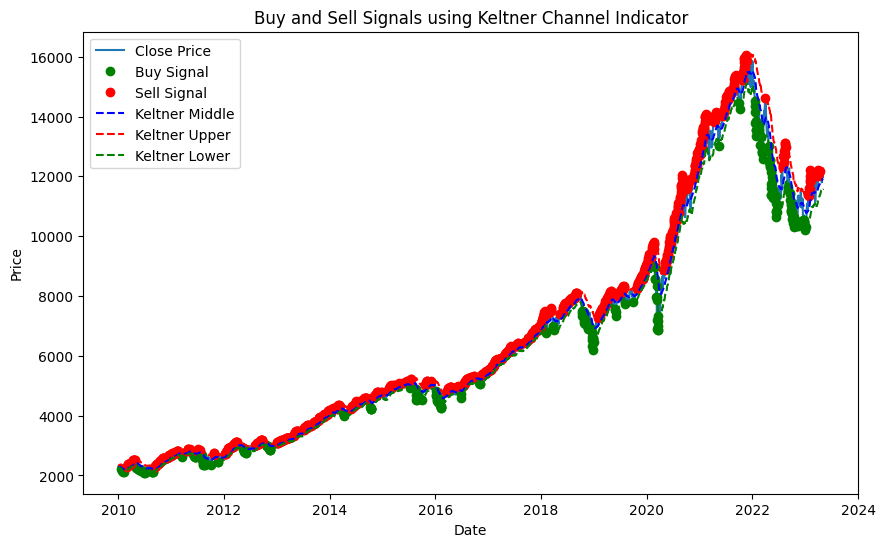

In [9]:
kc_middle = nasdaq_data['kc_middle']
kc_upper = nasdaq_data['kc_upper']
kc_lower = nasdaq_data['kc_lower']




nasdaq_data['signal1'] = 0




nasdaq_data.loc[nasdaq_data['Close'] > kc_upper, 'signal1'] = -1  
nasdaq_data.loc[nasdaq_data['Close'] < kc_lower, 'signal1'] = 1

plt.figure(figsize=(10, 6))
plt.plot(nasdaq_data['Close'], label='Close Price')
plt.plot(nasdaq_data.loc[nasdaq_data['signal1'] == 1, 'Close'], 'go', label='Buy Signal')
plt.plot(nasdaq_data.loc[nasdaq_data['signal1'] == -1, 'Close'], 'ro', label='Sell Signal')
plt.plot(kc_middle, 'b--', label='Keltner Middle')
plt.plot(kc_upper, 'r--', label='Keltner Upper')
plt.plot(kc_lower, 'g--', label='Keltner Lower')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Buy and Sell Signals using Keltner Channel Indicator')
plt.legend()
plt.show()



This plot shows the signal generation using keltner channel indicator

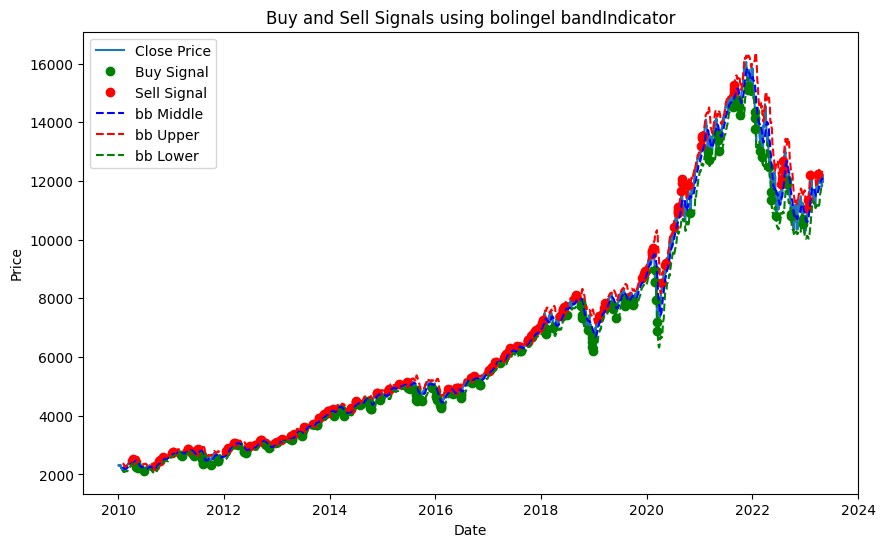

In [10]:
middle_bb = nasdaq_data['middle_bb']
upper_bb = nasdaq_data['upper_bb']
lower_bb = nasdaq_data['lower_bb']




nasdaq_data['signal2'] = 0




nasdaq_data.loc[nasdaq_data['Close'] > upper_bb, 'signal2'] = -1  
nasdaq_data.loc[nasdaq_data['Close'] < lower_bb, 'signal2'] = 1

plt.figure(figsize=(10, 6))
plt.plot(nasdaq_data['Close'], label='Close Price')
plt.plot(nasdaq_data.loc[nasdaq_data['signal2'] == 1, 'Close'], 'go', label='Buy Signal')
plt.plot(nasdaq_data.loc[nasdaq_data['signal2'] == -1, 'Close'], 'ro', label='Sell Signal')
plt.plot(middle_bb, 'b--', label='bb Middle')
plt.plot(upper_bb, 'r--', label='bb Upper')
plt.plot(lower_bb, 'g--', label='bb Lower')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Buy and Sell Signals using bolingel bandIndicator')
plt.legend()
plt.show()

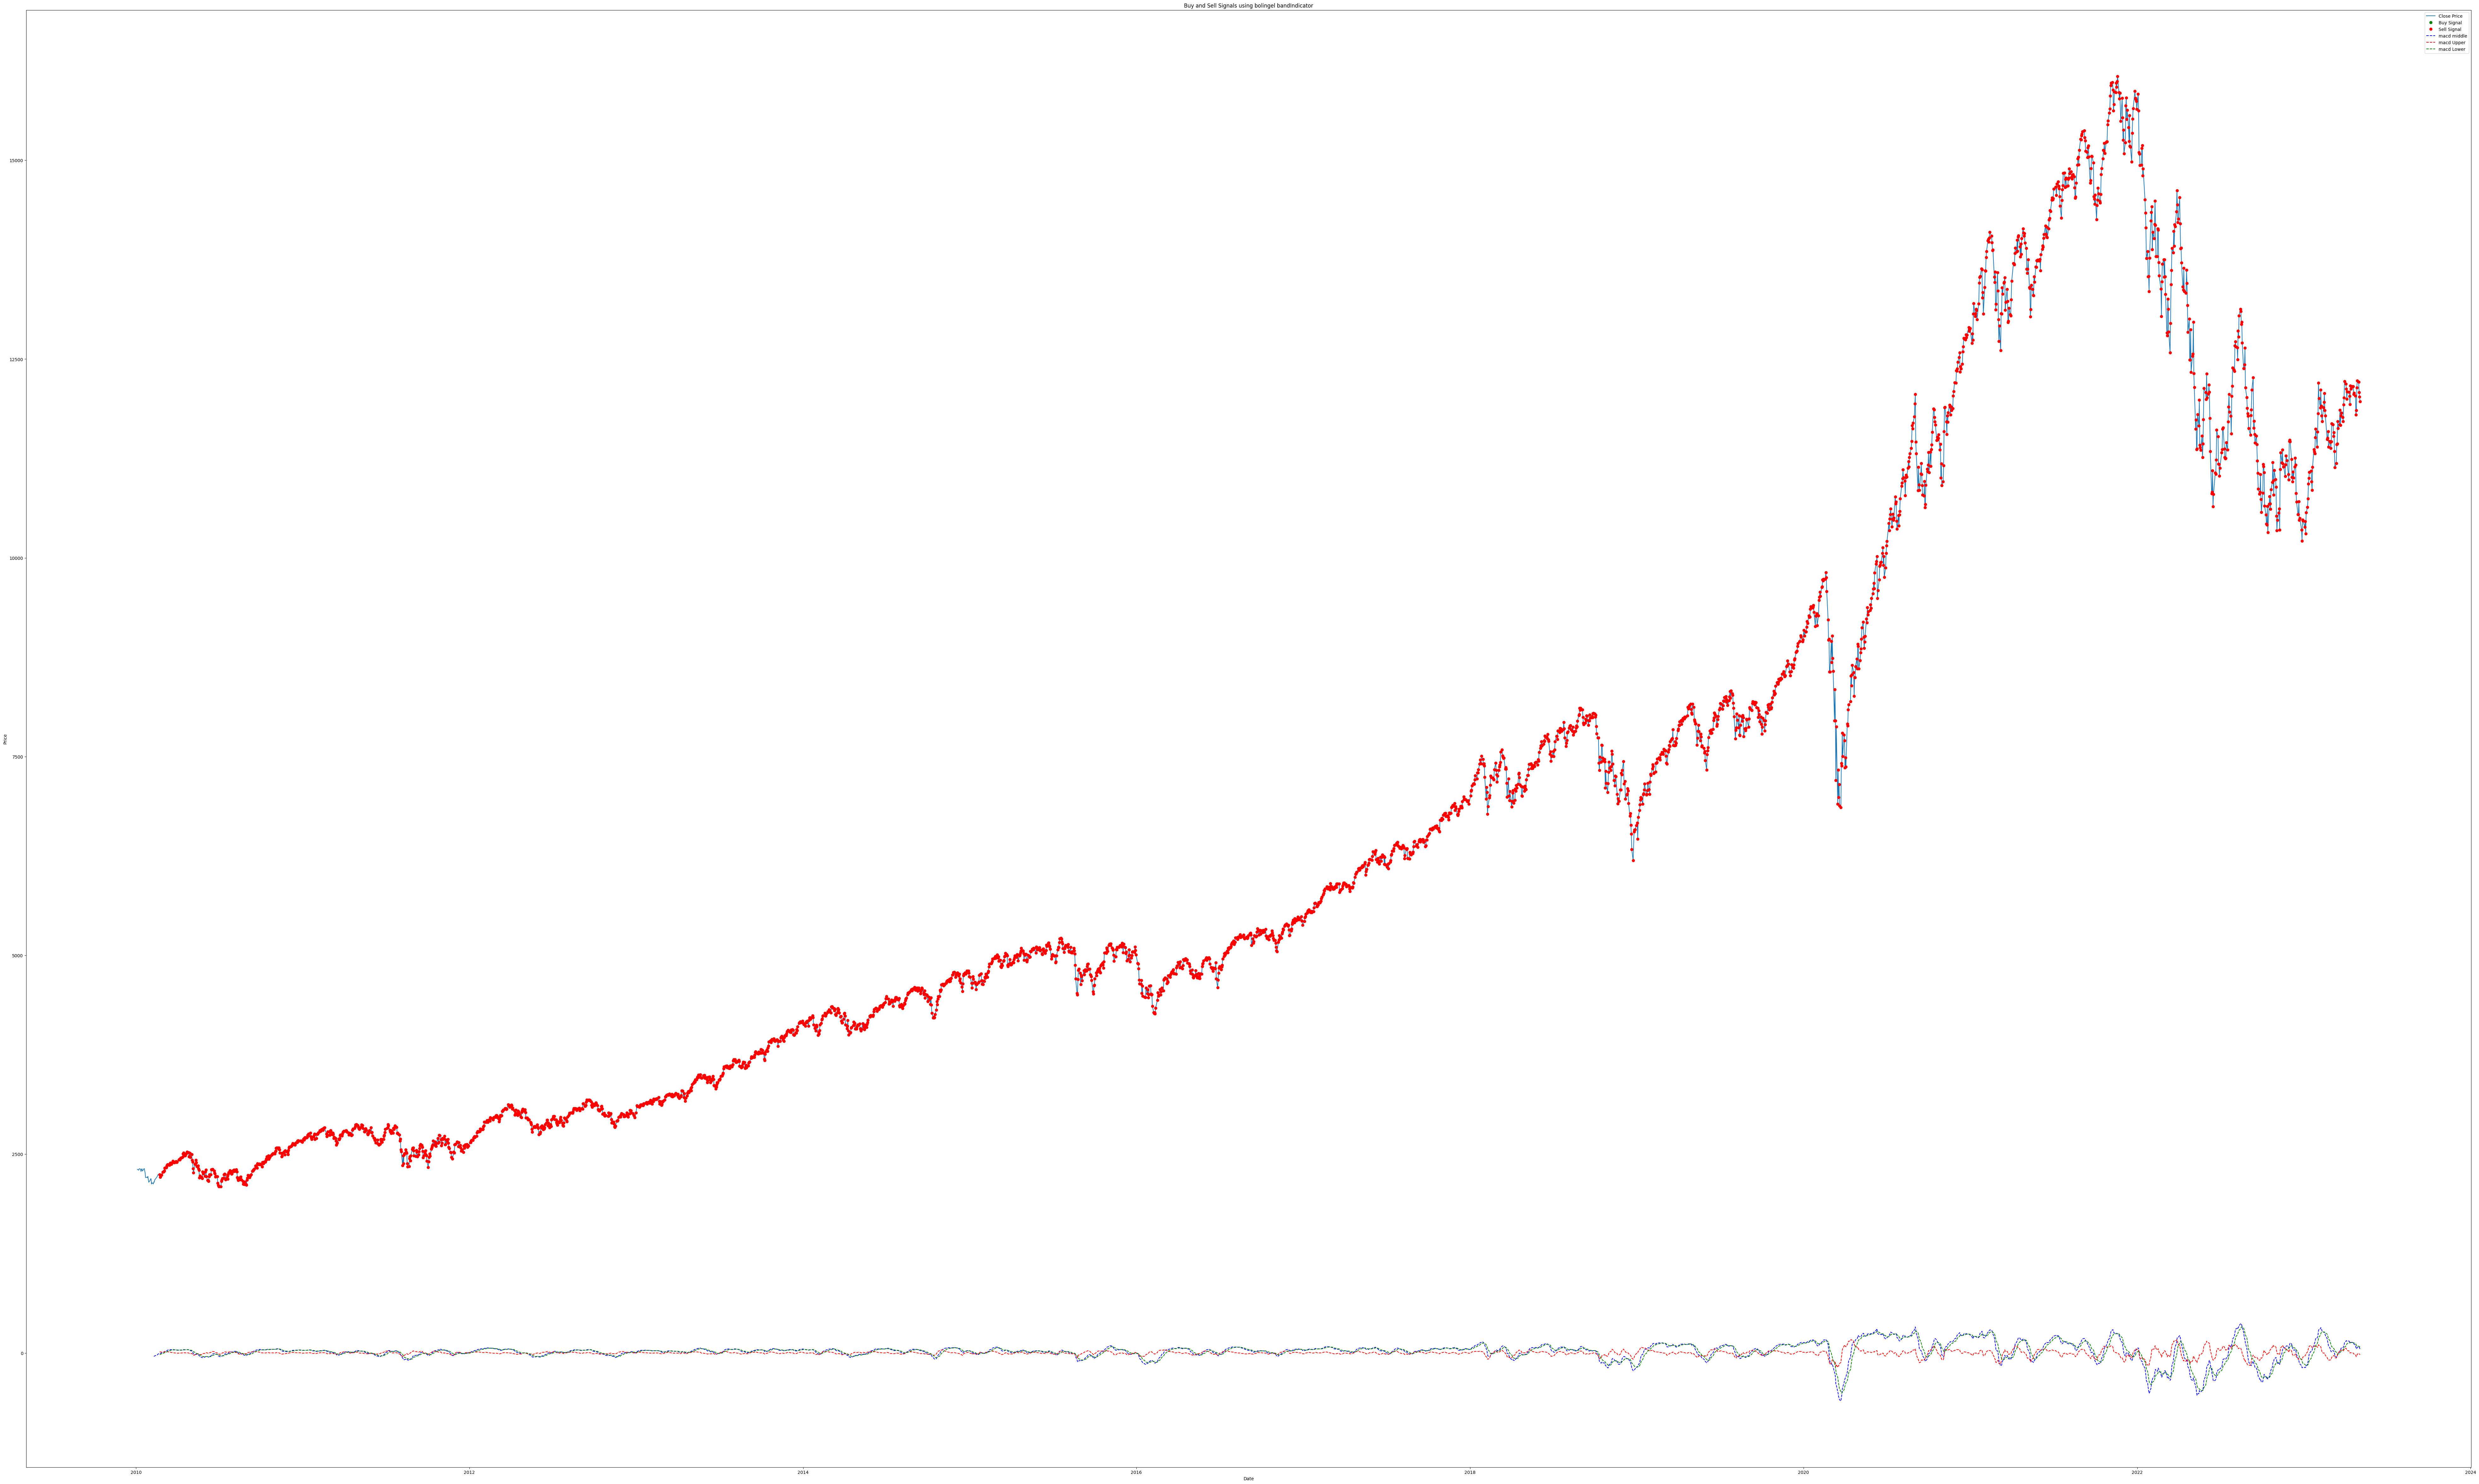

In [11]:
macd = nasdaq_data['macd']
macd_h = nasdaq_data['macd_h']
macd_s = nasdaq_data['macd_s']




nasdaq_data['signal3'] = 0




nasdaq_data.loc[nasdaq_data['Close'] > macd_h, 'signal3'] = -1  
nasdaq_data.loc[nasdaq_data['Close'] < macd_s, 'signal3'] = 1

plt.figure(figsize=(100, 60))
plt.plot(nasdaq_data['Close'], label='Close Price')
plt.plot(nasdaq_data.loc[nasdaq_data['signal3'] == 1, 'Close'], 'go', label='Buy Signal')
plt.plot(nasdaq_data.loc[nasdaq_data['signal3'] == -1, 'Close'], 'ro', label='Sell Signal')
plt.plot(macd, 'b--', label='macd middle')
plt.plot(macd_h, 'r--', label='macd Upper')
plt.plot(macd_s, 'g--', label='macd Lower')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Buy and Sell Signals using bolingel bandIndicator')
plt.legend()
plt.show()

calculation of sharpe ratio,cumulative returns and maximum drawdown using keltner channel indicator.
In the same way I will calculate the three terms for  MACD and Bolinger band indicator

In [13]:

# Calculate the daily returns based on the buy/sell signals
nasdaq_data['Return'] = nasdaq_data['signal3'].shift() * (nasdaq_data['Open'].pct_change())

# Calculate the cumulative returns
nasdaq_data['Cumulative Return'] = (1 + nasdaq_data['Return']/nasdaq_data['Open']).cumprod() 

# Calculate the rolling maximum of cumulative returns
nasdaq_data['rolling_max'] = nasdaq_data['Cumulative Return'].cummax()

# Calculate the drawdown
nasdaq_data['Drawdown'] = (nasdaq_data['Cumulative Return']  - nasdaq_data['rolling_max'])

# Calculate the maximum drawdown
max_drawdown = np.min(nasdaq_data['Drawdown'])

# Calculate the mean return and standard deviation
annualized_mean_return = nasdaq_data['Return'].mean()*252
annulaized_std_return =nasdaq_data['Return'].std()*(252**0.5)

# Determine the risk-free rate (e.g., 0.03 for 3%)
risk_free_rate = 0.00

# Calculate the Sharpe ratio
sharpe_ratio = (annualized_mean_return - risk_free_rate) / annulaized_std_return 

# Print the results
print("Cumulative Return:", nasdaq_data['Cumulative Return'].iloc[-1])
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)



Cumulative Return: 0.999639141121622
Sharpe Ratio: -0.7277900421050276
Maximum Drawdown: -0.0004141748614027163
